In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

from qiskit import IBMQ
from qiskit.tools.visualization import plot_histogram


## Caution: This is a sample circuit. Replace the following cell with any circuit that you have built

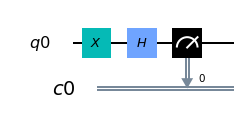

In [2]:
# Create a Quantum Circuit acting on a quantum register of one qubit
cr = ClassicalRegister(1)
qr = QuantumRegister(1)
circ = QuantumCircuit(qr,cr)
# Add an X gate on qubit 0
circ.x(qr[0])

# Add a H gate, putting this in superposition
circ.h(qr[0])
circ.measure(qr, cr)
circ.draw(output='mpl')

## Load accounts
### We will be running an experiment on a real qc only once - The number of quantum computers that are available are very less, and therefore our jobs might be queued! 

In [8]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()




c:\users\panga\documents\phd\venvs\quantum\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider = IBMQ.get_provider('ibm-q')
melbourne16 = provider.get_backend('ibmq_16_melbourne')

## Execute the job: The first argument should be replaced by your circuit name


In [4]:
job_mel16 = execute(circ, backend=melbourne16)

In [5]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_mel16)

Job Status: job has successfully run


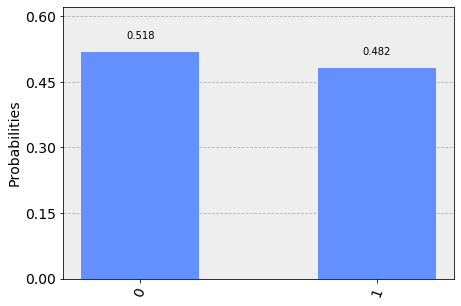

In [7]:
result_mel16 = job_mel16.result()
plot_histogram(result_mel16.get_counts(circ))